# Central Limit Theorem

Let's use a highly non-Gaussian distribution to illustrate the CLT.

To restate from the slides, the CLT asserts that the distribution you get from collection the mean of many samples of an underlying distribution, approaches a normal distribution as you keep getting more and more samples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, skewnorm

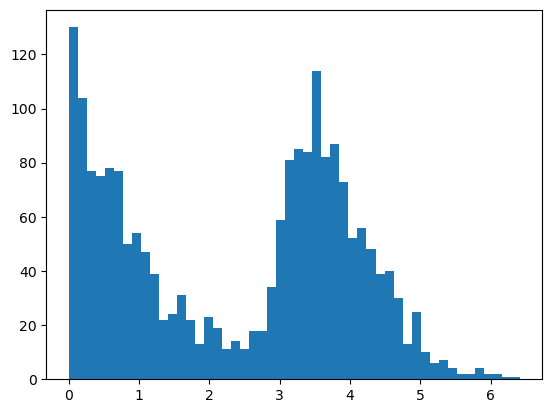

In [2]:
def get_data(n):
    data = np.concatenate((expon.rvs(scale=1, size=n//2), skewnorm.rvs(5, loc=3, size=n//2)))
    np.random.shuffle(data)
    return data
plt.hist(get_data(2000), bins=50);

Definitely not a normal distribution. So, `get_data` represents some way of sampling an underlying distribution. Normally in experiments, you can't ask for infinite amounts of data, you have to gather it, and that takes time, effort and money. Let's say we can only get 10 data points, and let's calculate the mean of those ten.

In [3]:
d10 = get_data(10)
print(d10.mean())

2.3292900602356723


Right, but if we re-run the above a few times, we'll see that the answer changes a lot with each run!

The magic is in the fact that the amount the answer changes by is not random. Well, between runs, it is, but I mean that it has certain statistical properties. Let's see what happens if we manage to get 10 data points 1000 times.

0.26075380093613276


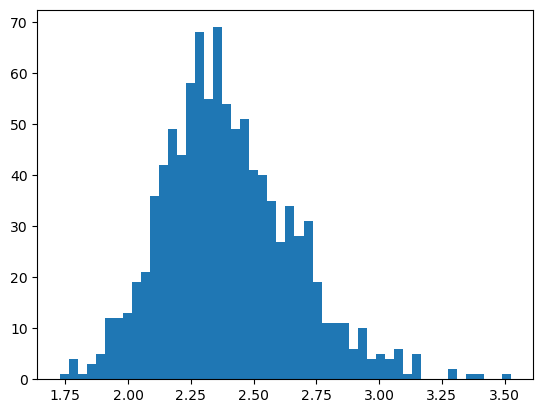

In [4]:
means = [get_data(10).mean() for i in range(1000)]
plt.hist(means, bins=50)
print(np.std(means))

The distribution of means is becoming more and more like a normal distribution. The peak of the distribution is approaching the true mean of the population, and the width of this distribution is a function of both the width of the population and the number of samples we used. If we used 100 data points, we would expect less scatter between samples, right?

Let's test.

0.08482112718267752


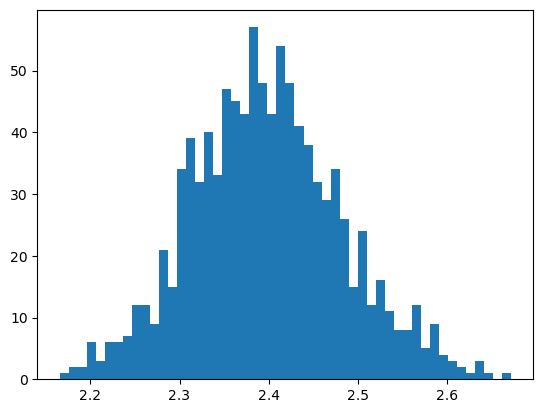

In [7]:
means = [get_data(100).mean() for i in range(1000)]
plt.hist(means, bins=50)
print(np.std(means))

Looks more like a normal, and we notice the spread is smaller as well. How much smaller though? Let's run some tests:

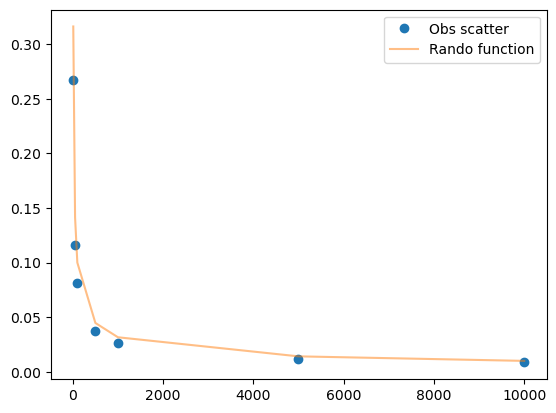

In [8]:
num_samps = [10, 50, 100, 500, 1000, 5000, 10000]
stds = []
for n in num_samps:
    stds.append(np.std([get_data(n).mean() for i in range(1000)]))
plt.plot(num_samps, stds, 'o', label="Obs scatter")
plt.plot(num_samps, 1 / np.sqrt(num_samps), label="Rando function", alpha=0.5)
plt.legend();

Surprise, the rando function isn't arbitrary, its $1/\sqrt{N}$.

The distribution of means has standard deviation proportional to the underlying distribution divided by the root of the number of samples.

Or another way to say this, if you have $N$ samples, the mean of your samples is distributed as per a normal around the true mean, with standard deviation $\sigma/\sqrt{N}$. 

Or *another* way of saying this, is that if you go from $N_1$ data points to $N_2$ data points, you can determine the mean $\sqrt{N_2/N_1}$ more accurately. 4 times as many samples doesn't give 4 times more accuracy, only double the accuracy.

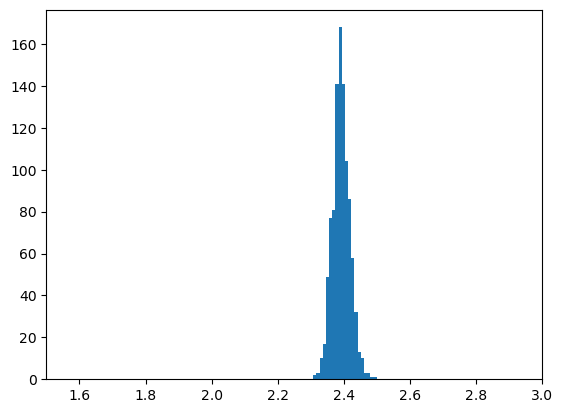

In [10]:
# For a final test, lets put this on the same scale as the first run but with 1000 samples.
plt.hist([get_data(1000).mean() for i in range(1000)], bins=20);
plt.xlim(1.5,3);

# Recap

1. Distribution of sample means approaches a normal
2. The width is determined by the number of points use to compute each sample mean

*****

If you have $N$ samples, the mean of your samples is distributed as per a normal around the true mean, with standard deviation $\sigma/\sqrt{N}$.

Or *another* way of saying this, is that if you go from $N_1$ data points to $N_2$ data points, you can determine the mean $\sqrt{N_2/N_1}$ more accurately. 4 times as many samples doesn't give 4 times more accuracy, only double the accuracy.

In [8]:
n = 1000
data = get_data(n)
sample_mean = np.mean(data)
uncert_mean = np.std(data) / np.sqrt(n)
print(f"We have determined the mean of population to be {sample_mean:.2f} +- {uncert_mean:.2f}")

We have determined the mean of population to be 2.40 +- 0.05


By convention, adding a $\pm$ represents the uncertainty to $1\sigma$ for a normal distribution. To refresh, $1\sigma$ is notation for 1 standard deviation away from the mean.

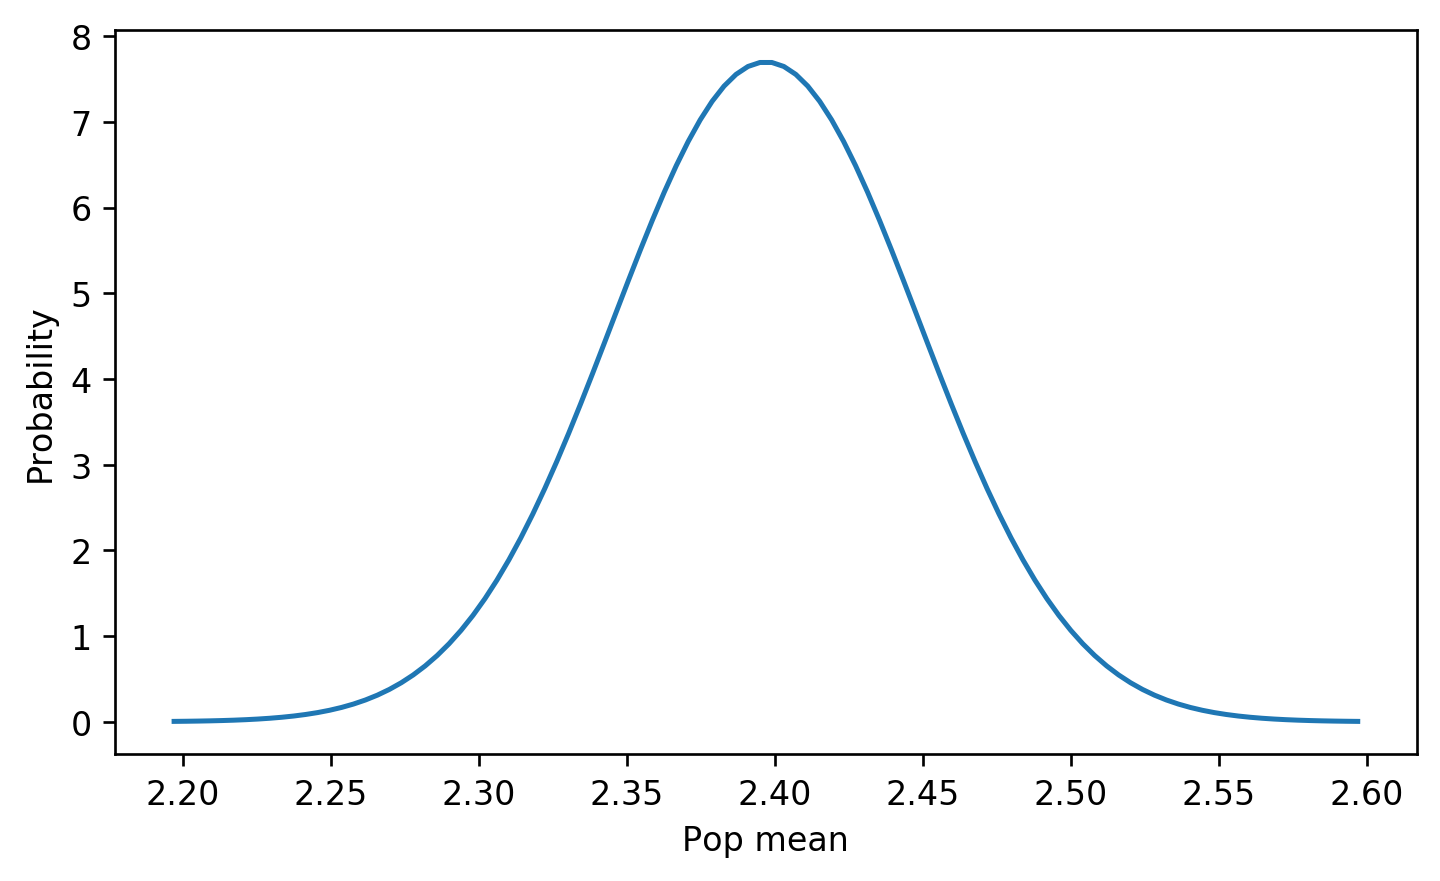

In [9]:
from scipy.stats import norm
xs = np.linspace(sample_mean - 0.2, sample_mean + 0.2, 100)
ys = norm.pdf(xs, sample_mean, uncert_mean)
plt.plot(xs, ys)
plt.xlabel("Pop mean")
plt.ylabel("Probability");